# __FINAL PROJECT PHASE II__

# __RESEARCH QUESTION:__
What factors affect if a U.S domestic flight will be delayed or cancelled? Which flights are most likely to be delayed or cancelled? How much time will each flight be delayed? Are there airlines that are better than others in terms of number of delays and delay times? Can flight history be used to predict the delay time of future flights?

In this assignment we will see if we can use our data from 2022, about if a flight has been delayed or not and the various factors affecting it. We will use values such as various values such as Cancelled, Diverted, Month, Operating Airline, Distance and originState and many more to see if we can predict if a flight will be delayed or cancelled, and possibly by how much.

## Data Cleaning:

We first imported our flights_2022 dataset. As can be seen on out GIT. The filed were very large thus have been split into part 1 and part2. This will make the analysis much easier. 
We first loaded the dataset as flight_2022.
As can be seen the head of both of these datsets have been printed. 

In [67]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score

We are combining part1 and part2 which are supposed to contain the first half of 2022 and the second half of 2022 data. We do this because our files are too large to upload on their own. However, the file conversion was messed up and so we only have data from the first half of 2022. For future parts of this project, we will reconvert the data and upload it using lfs for large files.

In [2]:

flights_2018=pd.read_csv('Flights_2018_Modified (1).csv')
airports = pd.read_csv('airports.csv')

In [3]:
flights_2018.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,32314,2018-01-01,Hawaiian Airlines Inc.,KOA,HNL,False,False,1543,1546.0,3.0,...,1555.0,1626.0,8.0,1632,2.0,0.0,0.0,1600-1659,1,0.0
1,223193,2018-01-01,Delta Air Lines Inc.,IND,ATL,False,False,937,943.0,6.0,...,1007.0,1113.0,4.0,1119,-2.0,0.0,-1.0,1100-1159,2,0.0
2,349735,2018-01-01,Allegiant Air,IAG,PGD,False,False,1043,1043.0,0.0,...,1111.0,1350.0,4.0,1341,13.0,0.0,0.0,1300-1359,5,0.0
3,263507,2018-01-01,Southwest Airlines Co.,LAS,OMA,False,False,2125,2200.0,35.0,...,2211.0,233.0,8.0,155,46.0,1.0,3.0,0001-0559,5,0.0
4,223533,2018-01-01,Delta Air Lines Inc.,ATL,BOS,False,False,1248,1247.0,0.0,...,1303.0,1454.0,16.0,1513,-3.0,0.0,-1.0,1500-1559,4,0.0


In [4]:
print(flights_2018.shape,'\n',flights_2018.columns)

(568948, 62) 
 Index(['Unnamed: 0', 'FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled',
       'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay',
       'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime',
       'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
       'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline',
       'Operating_Airline', 'DOT_ID_Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number',
       'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'Departur

We will be using 1000 random rows for now because our dataset is too large. We will figure out how to use all of the data for future parts of the project.

We have also loaded the airports dataset aairports. This datset contains the IATA, Airport, City, State, Country and Latitude and Longitude. As most of this dataset was very clean, we did not do much cleaning. 
The only cleaning we did was remove the colunm Country as all this data is for US, and is redundent. 
The code below is the code before Country is dropped. 

In [5]:
print(airports.shape,'\n',airports.columns)

(341, 7) 
 Index(['IATA', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE'], dtype='object')


In [6]:
airports.head()

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228


The code below removes the colunm COUNTRY.

In [7]:
airports = airports.drop('COUNTRY', axis=1)
airports.head()

,IATA,AIRPORT,CITY,STATE,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,41.938874,-72.683228


In the cells below we have used SQL to left join, the origin airports in the flights_2022 dataset to the IATA airports in the airports data. We have used duckDB and selected all the colunms as well as rebamed some colunms such as: airport.city as origin_city and airports_latitude as origin latitude to make it easier.

In [8]:
df = duckdb.sql('''
SELECT flights_2018.*
, airports.city AS origin_city
, airports.state AS origin_state
, airports.latitude AS origin_latitude
, airports.longitude AS origin_longitude
FROM flights_2018
LEFT JOIN airports ON flights_2018.origin = airports.IATA
''').df()

In the this cells below we have used SQL to left join, the final destinantion airports in the flights_2022 dataset to the IATA airports in the airports data. We have used duckDB and selected all the colunms as well as renamed some colunms such as: airport.city as origin_city and airports_latitude as origin latitude to make it easier.

In [9]:
df2 = duckdb.sql('''
SELECT df.*
, airports.city AS dest_city
, airports.state AS dest_state
, airports.latitude AS dest_latitude
, airports.longitude AS dest_longitude
FROM df
LEFT JOIN airports ON df.dest = airports.IATA
''').df()

This is the output of the head (first 5 rows of the final dataframe df2)

In [10]:
df2.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,DistanceGroup,DivAirportLandings,origin_city,origin_state,origin_latitude,origin_longitude,dest_city,dest_state,dest_latitude,dest_longitude
0,5615196,2018-09-21,Republic Airlines,ORD,CMH,False,False,1750,1744.0,0.0,...,2,0.0,Chicago,IL,41.979595,-87.904464,Columbus,OH,39.997985,-82.891883
1,5173533,2018-09-21,United Air Lines Inc.,LAX,ORD,False,False,1020,1007.0,0.0,...,7,0.0,Los Angeles,CA,33.942536,-118.408074,Chicago,IL,41.979595,-87.904464
2,5290400,2018-09-21,Republic Airlines,CMH,ORD,False,False,815,956.0,101.0,...,2,0.0,Columbus,OH,39.997985,-82.891883,Chicago,IL,41.979595,-87.904464
3,5344057,2018-09-21,Delta Air Lines Inc.,SLC,ATL,False,False,1410,1419.0,9.0,...,7,0.0,Salt Lake City,UT,40.788388,-111.977773,Atlanta,GA,33.640444,-84.426944
4,5342478,2018-09-21,Delta Air Lines Inc.,ATL,RDU,False,False,1755,1805.0,10.0,...,2,0.0,Atlanta,GA,33.640444,-84.426944,Raleigh,NC,35.877639,-78.787472


Now while going through the data we realized that there were 70 colunms in this datset. To make the analysis easier for us, we identifies the colunms that would be relevent to our analysis and we kept those, while we removed the remaining colunms. The new dataframe has 61 colunms. This would make our analysis much easier. We have printed the first five rows of the new_df

In [33]:
#Selecting only specified colunms from df2. 
cols = ['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup', 'DivAirportLandings', 'origin_latitude', 'origin_longitude', 'dest_latitude', 'dest_longitude']
new_df = df2[cols]

In [34]:
new_df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,origin_latitude,origin_longitude,dest_latitude,dest_longitude
0,2018-09-21,Republic Airlines,ORD,CMH,False,False,1750,1744.0,0.0,-6.0,...,-18.0,0.0,-2.0,2000-2059,2,0.0,41.979595,-87.904464,39.997985,-82.891883
1,2018-09-21,United Air Lines Inc.,LAX,ORD,False,False,1020,1007.0,0.0,-13.0,...,-15.0,0.0,-1.0,1600-1659,7,0.0,33.942536,-118.408074,41.979595,-87.904464
2,2018-09-21,Republic Airlines,CMH,ORD,False,False,815,956.0,101.0,101.0,...,98.0,1.0,6.0,0800-0859,2,0.0,39.997985,-82.891883,41.979595,-87.904464
3,2018-09-21,Delta Air Lines Inc.,SLC,ATL,False,False,1410,1419.0,9.0,9.0,...,1.0,0.0,0.0,1900-1959,7,0.0,40.788388,-111.977773,33.640444,-84.426944
4,2018-09-21,Delta Air Lines Inc.,ATL,RDU,False,False,1755,1805.0,10.0,10.0,...,10.0,0.0,0.0,1900-1959,2,0.0,33.640444,-84.426944,35.877639,-78.787472


While scanning through the cols, it was noticed that DepDelay had some negetive values. This does not make sense as the delay can't be negetive and this makes our analysis very hard. But DepDelayMinuets fixes that, it changes all the negetive values to 0.0. 
Similarly, for ArrDelay, there are some negetive values. However ArrDelay15 does not chnage the negetive values and there is no other col that does that. 
In the cell below We will change all the negetive values in ArrDelay to 0.0 to make a new Col called ArrDelayMinuets.

In [35]:
#Editing values of ArrDelay
new_df['ArrDelayMinuets'] = new_df['ArrDelay'].apply(lambda x: max(0.0,x))
new_df.head()

/var/folders/zv/npgqrjp57ygbmvyh7zhqp9hc0000gn/T/ipykernel_30428/1959714141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ArrDelayMinuets'] = new_df['ArrDelay'].apply(lambda x: max(0.0,x))


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,origin_latitude,origin_longitude,dest_latitude,dest_longitude,ArrDelayMinuets
0,2018-09-21,Republic Airlines,ORD,CMH,False,False,1750,1744.0,0.0,-6.0,...,0.0,-2.0,2000-2059,2,0.0,41.979595,-87.904464,39.997985,-82.891883,0.0
1,2018-09-21,United Air Lines Inc.,LAX,ORD,False,False,1020,1007.0,0.0,-13.0,...,0.0,-1.0,1600-1659,7,0.0,33.942536,-118.408074,41.979595,-87.904464,0.0
2,2018-09-21,Republic Airlines,CMH,ORD,False,False,815,956.0,101.0,101.0,...,1.0,6.0,0800-0859,2,0.0,39.997985,-82.891883,41.979595,-87.904464,98.0
3,2018-09-21,Delta Air Lines Inc.,SLC,ATL,False,False,1410,1419.0,9.0,9.0,...,0.0,0.0,1900-1959,7,0.0,40.788388,-111.977773,33.640444,-84.426944,1.0
4,2018-09-21,Delta Air Lines Inc.,ATL,RDU,False,False,1755,1805.0,10.0,10.0,...,0.0,0.0,1900-1959,2,0.0,33.640444,-84.426944,35.877639,-78.787472,10.0


Now we want to calculate the frequency of flights arriving and leaving from each airport. To do this we have, used SQL to extract the count of destinations that airports are uwing SQL and making in a dataframe and then merging it with the our main datafram df2. 
We did the same thing for arrivals.

In [36]:
#Airport cleaning on the top 10 most busiest airports with origin and destination 

origin_groupby = duckdb.sql('''
SELECT origin, COUNT(origin) AS origin_count
FROM df2
GROUP BY origin
ORDER BY origin_count DESC
''').df()

dest_groupby = duckdb.sql('''
SELECT dest, COUNT(dest) AS dest_count
FROM df2
GROUP BY dest
ORDER BY dest_count DESC
''').df()

In [37]:
#Merge with destination
all_df = duckdb.sql('''
SELECT * 
FROM new_df
JOIN origin_groupby ON new_df.origin=origin_groupby.origin
JOIN dest_groupby ON new_df.dest=dest_groupby.dest
''').df()

all_df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,DivAirportLandings,origin_latitude,origin_longitude,dest_latitude,dest_longitude,ArrDelayMinuets,Origin_2,origin_count,Dest_2,dest_count
0,2018-11-30,Southwest Airlines Co.,BUF,BWI,False,False,1300,1303.0,3.0,3.0,...,0.0,42.940525,-78.732167,39.175402,-76.668198,0.0,BUF,2194,BWI,9809
1,2018-11-30,Republic Airlines,ORD,CMH,False,False,2125,2121.0,0.0,-4.0,...,0.0,41.979595,-87.904464,39.997985,-82.891883,0.0,ORD,29077,CMH,3308
2,2018-11-30,Comair Inc.,ORF,LGA,False,False,1051,1042.0,0.0,-9.0,...,0.0,36.894611,-76.201222,40.777243,-73.872609,0.0,ORF,1672,LGA,9961
3,2018-11-30,SkyWest Airlines Inc.,LGA,ORD,False,False,1115,1114.0,0.0,-1.0,...,0.0,40.777243,-73.872609,41.979595,-87.904464,0.0,LGA,9869,ORD,29220
4,2018-11-30,Delta Air Lines Inc.,PBI,DTW,False,False,1220,1213.0,0.0,-7.0,...,0.0,26.683162,-80.095594,42.212059,-83.348836,0.0,PBI,1937,DTW,10008


# __EXPLORATORY ANALYSIS:__

In the cell below I have calculated the maximum, minimum, standard deviation, mean and median of the times of the delay in departure times in minuets for airplanes in all airports in 2022. The maximum is 7223 minuets which is around 5 Days. Which is a very high ammount. This could possibly be due to a storm or unforceen condition. Possibly in a smaller airports where there are no other flights that can take the passangers, due to which the flight is delayed 5 days. 
The minimum is 0. Suggesting that the flight is not delayed and is on time
The mean is 15.7 minuets. 
The fact that the median for departure is 0 suggests that half of the flights might have not been delayed. 

In [38]:
#Summary Statistics of Delay Analysis
#Departure delay stats;
delay_max = max(all_df['DepDelayMinutes'])
delay_min = min(all_df['DepDelayMinutes'])
delay_std = np.std(all_df['DepDelayMinutes'])
delay_mean = all_df['DepDelayMinutes'].mean()
delay_median = all_df['DepDelayMinutes'].median()
print("This is the max Departure Delay in the year 2022: " + str(delay_max))
print("This is the min Departure Delay in the year 2022: " +str(delay_min))
print("This is the standard deviation Departure Delay in the year 2022: " +str(delay_std))
print("This is the mean Departure Delay in the year 2022: " +str(delay_mean))
print("This is the median Departure Delay in the year 2022: " +str(delay_median))

This is the max Departure Delay in the year 2022: 1723.0
This is the min Departure Delay in the year 2022: 0.0
This is the standard deviation Departure Delay in the year 2022: 44.298490404191675
This is the mean Departure Delay in the year 2022: 13.437121901600728
This is the median Departure Delay in the year 2022: 0.0


In [39]:
#Summary Statistics of Arrival Analysis
#Departure delay stats;
arr_max = max(all_df['ArrDelayMinutes'])
arr_min = min(all_df['ArrDelayMinutes'])
arr_std = np.std(all_df['ArrDelayMinutes'])
arr_mean = all_df['ArrDelayMinutes'].mean()
arr_median = all_df['ArrDelayMinutes'].median()
print("This is the max Arrival Delay in the year 2022: " + str(arr_max))
print("This is the min Arrival Delay in the year 2022: " +str(arr_min))
print("This is the standard deviation Arrival Delay in the year 2022: " +str(arr_std))
print("This is the mean Arrival Delay in the year 2022: " +str(arr_mean))
print("This is the median Arrival Delay in the year 2022: " +str(arr_median))

This is the max Arrival Delay in the year 2022: 1773.0
This is the min Arrival Delay in the year 2022: 0.0
This is the standard deviation Arrival Delay in the year 2022: 44.121545298687366
This is the mean Arrival Delay in the year 2022: 13.669847417042188
This is the median Arrival Delay in the year 2022: 0.0


The plot below describes the Frequency of cancellations per domestic US airline
From the Plot below we can see the the airlines with the most cancellations is Air wisconsin and american airlines, while hawaiian and Horizon have the least number of cancellations. From the plot we can see that biggesr companies like delta, jetblue and american have pretty hih cancellation rates compared to other airlines with american airlines having the most.

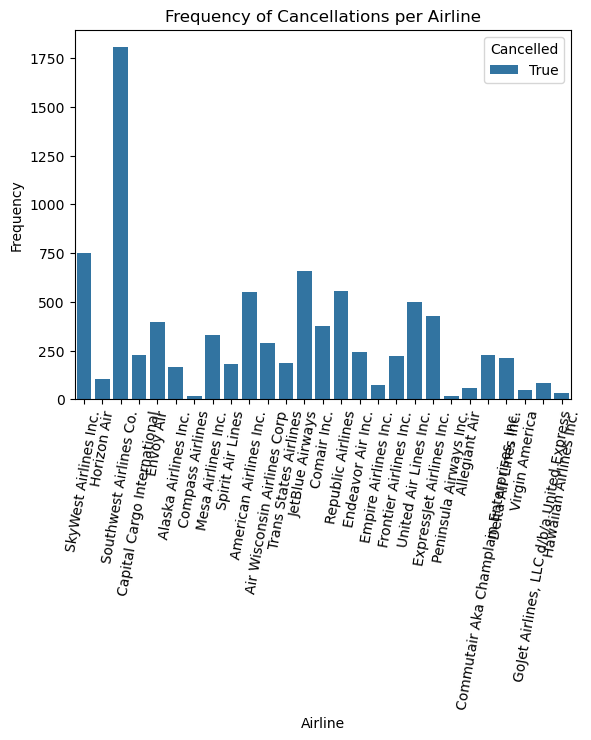

In [40]:
#plotting of the the different airlines and frequency of cancellations
## Delay categories per Airline.
filtered_df = all_df[all_df['Cancelled'] == True]
sns.countplot(data=filtered_df, x='Airline', hue='Cancelled')
plt.title('Frequency of Cancellations per Airline')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.xticks(rotation=80) 
plt.show()

The plot below shows the frequency of Divertions each airline had in 2022. 
From this plot we can see that gojet, american, delta and skywest had the most divertions and the smaller companies like Hawaiian and Horizon had the lest nuymber of divertions.Again from this plot we can see that american airlines had the most number of diversions.
This can help us say that american airlines had the most number of cancellations and divertions in 2022. These could has possibly been due to weather conditions, lack of passengers, lack of staff or any mechanical issues.

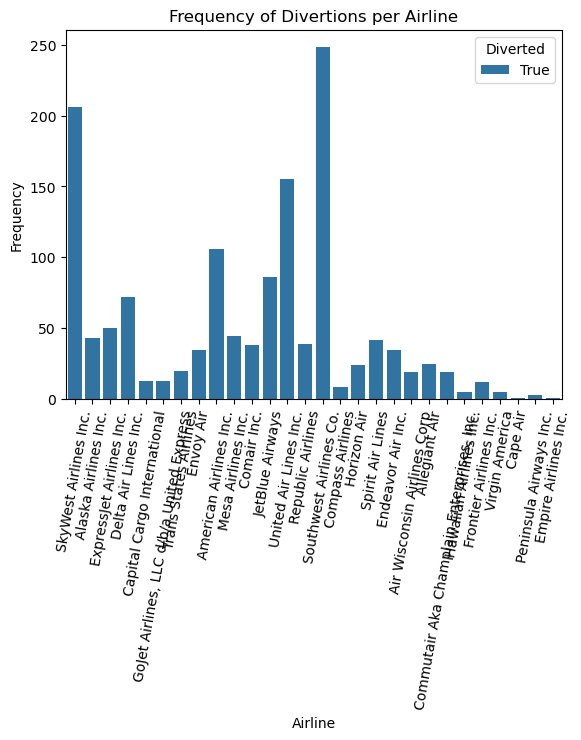

In [41]:
#plotting of the the different airlines and frequency of delays
## Delay categories per Airline.
filtered_df = all_df[all_df['Diverted'] == True]
sns.countplot(data=filtered_df, x='Airline', hue='Diverted')
plt.title('Frequency of Divertions per Airline')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.xticks(rotation=80) 
plt.show()

In [42]:
#DELETE LATER
top_10_origin = origin_groupby.head(10)
top_10_dest = dest_groupby.head(10)

From the above number we can see that the top 10 most popular/ airports with the highest frequency are the same. Now we will plot a graph with this data. This would help us visualize the dat we seen above.

In [43]:
#top_10_origin
top_10_origin

,Origin,origin_count
0,ORD,29077
1,DEN,24850
2,ATL,22571
3,LAX,18467
4,IAH,16218
5,SFO,15805
6,EWR,15092
7,LAS,14459
8,SEA,13180
9,DFW,13035


In [44]:
#top_10_dest
top_10_dest

,Dest,dest_count
0,ORD,29220
1,DEN,25086
2,ATL,22391
3,LAX,18221
4,IAH,16330
5,SFO,15839
6,EWR,15198
7,LAS,14450
8,SEA,13275
9,DFW,13188


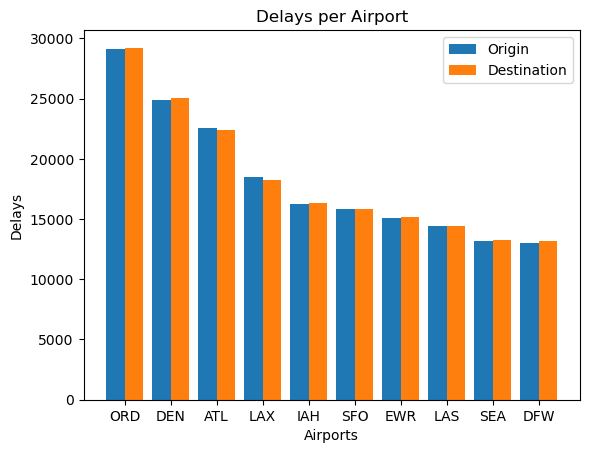

In [45]:
#Now we plot the data from above
joined = top_10_origin.merge(top_10_dest,left_on='Origin',right_on='Dest')
X= joined['Origin']
Y1 = joined['origin_count']
Y2 = joined['dest_count']
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, Y1, 0.4, label = 'Origin') 
plt.bar(X_axis + 0.2, Y2, 0.4, label = 'Destination') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Airports") 
plt.ylabel("Delays") 
plt.title("Delays per Airport") 
plt.legend() 
plt.show() 

In [46]:
#Using the top 10 most busiest airports from above I will see the flight delay. To see if there is any relation
top_10_airports = df2[df2['Origin'].isin(['ATL', 'ORD', 'DFW', 'DEN', 'CTL', 'LAX', 'LGA', 'SEA', 'PHX', 'LAS'])]

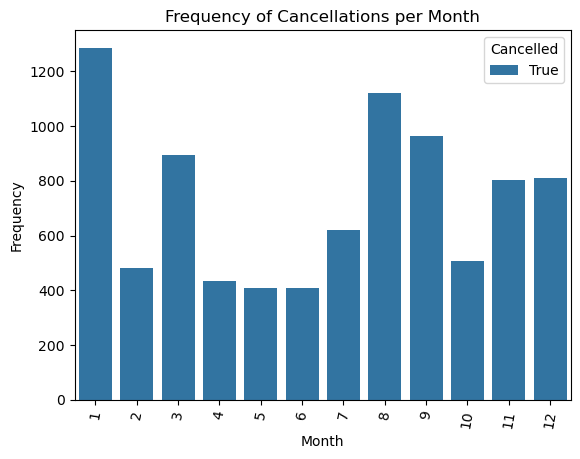

In [47]:
#Time analysis: Depending on the time, how many delays- depending on the month

filtered_df = all_df[all_df['Cancelled'] == True]
sns.countplot(data=filtered_df, x='Month', hue='Cancelled')
plt.title('Frequency of Cancellations per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=80) 
plt.show()

Correlation matrix is : 


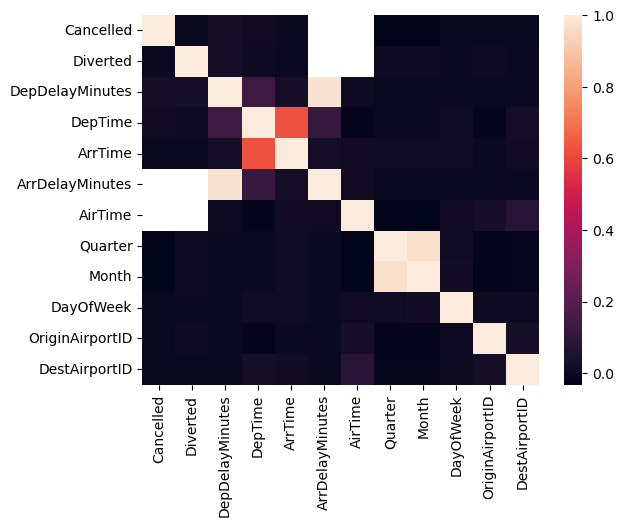

In [48]:
#Correlation analysis of all our colunms
flights_2018_corr = flights_2018[['Cancelled','Diverted','DepDelayMinutes','DepTime','ArrTime','ArrDelayMinutes','AirTime','Quarter','Month','DayOfWeek','OriginAirportID','DestAirportID']]
matrix = flights_2018_corr.corr()
sns.heatmap(matrix)
print("Correlation matrix is : ")
#print(matrix)

From this correlation matrix, we notice that many of the variables we have selected have low correlation with each other, other than the variables that would make sense to be correlated (if a flight is delayed, then its arrival time will be later). This indicates we should look for other data that more directly correlates to the DepDelayMinutes to be able to eventually make predictions based on the data. 

We originally had planned to use weather data as well, but found that the API we were scraping from only had current data. For future parts of the project, we plan to see if there are other resources we can use that have historical weather data and whether that has a greater correlation.

# __DATA DESCRIPTION:__

__Where can your raw source data be found, if applicable? Provide a link to the raw data.__

Flights Delay Prediction: https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022?select=Combined_Flights_2022.csv

List of US Airports:https://www.kaggle.com/datasets/aravindram11/list-of-us-airports

NWS Weather Data (Using data scraping and API): https://www.weather.gov/documentation/services-web-api




### __MOTIVATION__
__For what purpose was the dataset created?__
- Flight delays are something most of us who have traveled by air have experienced. Regardless of the reason for delays, they pose a huge inconvenience for travelers. These datasets were created so that relevant analysis can be done on the vast amount of data available on flight travel. This would help generate valuable insight into the cause and effect of flight delays. Gaining insight into this would help airline companies, airports, and passengers. 
- The dataset on the list of US airports with geolocation coordinates was created by Aravind Ram Nathan on Kaggle to make plotting on map analysis easier for researchers. 

__Who funded the creation of the dataset?__
- It is unclear who funded the creation of the Flight Status Prediction Dataset, but the data has been extracted from the Marketing Carrier On-Time Performance (Beginning January 2018) data table of the "On-Time" database from the TranStats data library.


### __COMPOSITION__

__Is the data self contained, or does it link to or otherwise rely on external resources ( Like websites, tweets and other databases)__
While, the main dataset we will be working with ( Flight status prediction database) which was extracted from Marketing Carrier On-Time Performance (Beginning January 2018) data table of the "On-Time" database from the TranStats data library, contains most of the data we will be using for our analysis. As mentioned earlier we did also rely on other external sources for data on US Airports and data on weather in different locations in the US from the National Weather Service. 
All the data from the 3 sources are easy to understand and usable form for our analysis.

__What are the observations(rows) and attributes (columns)?__
- *Note all these Column names and descriptions are from the kaggle description of the dataset

__Columns (flight status prediction dataset)__
Year: Year 
Quarter: Quarter (1-4)
Month: Month
DayofMonth: Day of Month
DayOfWeek: Day of Week
FlightDate: Flight Date (yyyymmdd)
Marketing_Airline_Network: Unique Marketing Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
Operated_or_Branded_Code_Share_Partners: Reporting Carrier Operated or Branded Code Share Partners
DOT_ID_Marketing_Airline: An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.
IATA_Code_Marketing_Airline: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
Flight_Number_Marketing_Airline: Flight Number
Originally_Scheduled_Code_Share_Airline: Unique Scheduled Operating Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users,for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
DOT_ID_Originally_Scheduled_Code_Share_Airline: An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.
ATA_Code_Originally_Scheduled_Code_Share_Airline: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
Flight_Num_Originally_Scheduled_Code_Share_Airline: Flight Number
Operating_Airline: Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
DOT_ID_Operating_Airline: An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.
IATA_Code_Operating_Airline: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
Tail_Number: Tail Number
Flight_Number_Operating_Airline: Flight Number
OriginAirportID: Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
OriginAirportSeqID: Origin Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time.
OriginCityMarketID: Origin Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.
Origin: Origin Airport
OriginCityName: Origin Airport, City Name
OriginState: Origin Airport, State Code
OriginStateFips: Origin Airport, State Fips
OriginStateName: Origin Airport, State Name
OriginWac: Origin Airport, World Area Code
DestAirportID: Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
DestAirportSeqID: Destination Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time.
DestCityMarketID: Destination Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.
Dest: Destination Airport
DestCityName: Destination Airport, City Name
DestState: Destination Airport, State Code
DestStateFips: Destination Airport, State Fips
DestStateName: Destination Airport, State Name
DestWac: Destination Airport, World Area Code
CRSDepTime: CRS Departure Time (local time: hhmm)
DepTime: Actual Departure Time (local time: hhmm)
DepDelay: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
DepDelayMinutes: Difference in minutes between scheduled and actual departure time. Early departures set to 0.
DepDel15: Departure Delay Indicator, 15 Minutes or More (1=Yes)
DepartureDelayGroups: Departure Delay intervals, every (15 minutes from 180)
DepTimeBlk: CRS Departure Time Block, Hourly Intervals
TaxiOut: Taxi Out Time, in Minutes
WheelsOff: Wheels Off Time (local time: hhmm)
WheelsOn: Wheels On Time (local time: hhmm)
TaxiIn: Taxi In Time, in Minutes
CRSArrTime: CRS Arrival Time (local time: hhmm)
ArrTime: Actual Arrival Time (local time: hhmm)
ArrDelay: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
ArrDelayMinutes: Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.
ArrDel15: Arrival Delay Indicator, 15 Minutes or More (1=Yes)
ArrivalDelayGroups: Arrival Delay intervals, every (15-minutes from 180)
ArrTimeBlk: CRS Arrival Time Block, Hourly Intervals
Cancelled: Cancelled Flight Indicator (1=Yes)
CancellationCode: Specifies The Reason For Cancellation
Diverted: Diverted Flight Indicator (1=Yes)
CRSElapsedTime: CRS Elapsed Time of Flight, in Minutes
ActualElapsedTime: Elapsed Time of Flight, in Minutes
AirTime: Flight Time, in Minutes
Flights: Number of Flights
Distance: Distance between airports (miles)
DistanceGroup: Distance Intervals, every 250 Miles, for Flight Segment
CarrierDelay: Carrier Delay, in Minutes
WeatherDelay: Weather Delay, in Minutes
NASDelay: National Air System Delay, in Minutes
SecurityDelay: Security Delay, in Minutes
LateAircraftDelay: Late Aircraft Delay, in Minutes
FirstDepTime: First Gate Departure Time at Origin Airport
TotalAddGTime: Total Ground Time Away from Gate for Gate Return or Cancelled Flight
LongestAddGTime: Longest Time Away from Gate for Gate Return or Cancelled Flight
DivAirportLandings: Number of Diverted Airport Landings
DivReachedDest: Diverted Flight Reaching Scheduled Destination Indicator (1=Yes)
DivActualElapsedTime: Elapsed Time of Diverted Flight Reaching Scheduled Destination, in Minutes. The ActualElapsedTime column remains NULL for all diverted flights.
DivArrDelay: Difference in minutes between scheduled and actual arrival time for a diverted flight reaching scheduled destination. The ArrDelay column remains NULL for all diverted flights.
DivDistance: Distance between scheduled destination and final diverted airport (miles). Value will be 0 for diverted flight reaching scheduled destination.
Div1Airport: Diverted Airport Code1
Div1AirportID: Airport ID of Diverted Airport 1. Airport ID is a Unique Key for an Airport
Div1AirportSeqID: Airport Sequence ID of Diverted Airport 1. Unique Key for Time Specific Information for an Airport
Div1WheelsOn: Wheels On Time (local time: hhmm) at Diverted Airport Code1
Div1TotalGTime: Total Ground Time Away from Gate at Diverted Airport Code1
Div1LongestGTime: Longest Ground Time Away from Gate at Diverted Airport Code1
Div1WheelsOff: Wheels Off Time (local time: hhmm) at Diverted Airport Code1
Div1TailNum: Aircraft Tail Number for Diverted Airport Code1
Div2Airport: Diverted Airport Code2
Div2AirportID: Airport ID of Diverted Airport 2. Airport ID is a Unique Key for an Airport
Div2AirportSeqID: Airport Sequence ID of Diverted Airport 2. Unique Key for Time Specific Information for an Airport
Div2WheelsOn: Wheels On Time (local time: hhmm) at Diverted Airport Code2
Div2TotalGTime: Total Ground Time Away from Gate at Diverted Airport Code2
Div2LongestGTime: Longest Ground Time Away from Gate at Diverted Airport Code2
Div2WheelsOff: Wheels Off Time (local time: hhmm) at Diverted Airport Code2
Div2TailNum: Aircraft Tail Number for Diverted Airport Code2
Div3Airport: Diverted Airport Code3
Div3AirportID: Airport ID of Diverted Airport 3. Airport ID is a Unique Key for an Airport
Div3AirportSeqID: Airport Sequence ID of Diverted Airport 3. Unique Key for Time Specific Information for an Airport
Div3WheelsOn: Wheels On Time (local time: hhmm) at Diverted Airport Code3
Div3TotalGTime: Total Ground Time Away from Gate at Diverted Airport Code3
Div3LongestGTime: Longest Ground Time Away from Gate at Diverted Airport Code3
Div3WheelsOff: Wheels Off Time (local time: hhmm) at Diverted Airport Code3
Div3TailNum: Aircraft Tail Number for Diverted Airport Code3
Div4Airport: Diverted Airport Code4
Div4AirportID: Airport ID of Diverted Airport 4. Airport ID is a Unique Key for an Airport
Div4AirportSeqID: Airport Sequence ID of Diverted Airport 4. Unique Key for Time Specific Information for an Airport
Div4WheelsOn: Wheels On Time (local time: hhmm) at Diverted Airport Code4
Div4TotalGTime: Total Ground Time Away from Gate at Diverted Airport Code4
Div4LongestGTime: Longest Ground Time Away from Gate at Diverted Airport Code4
Div4WheelsOff: Wheels Off Time (local time: hhmm) at Diverted Airport Code4
Div4TailNum: Aircraft Tail Number for Diverted Airport Code4
Div5Airport: Diverted Airport Code5
Div5AirportID: Airport ID of Diverted Airport 5. Airport ID is a Unique Key for an Airport
Div5AirportSeqID: Airport Sequence ID of Diverted Airport 5. Unique Key for Time Specific Information for an Airport
Div5WheelsOn: Wheels On Time (local time: hhmm) at Diverted Airport Code5
Div5TotalGTime: Total Ground Time Away from Gate at Diverted Airport Code5
Div5LongestGTime: Longest Ground Time Away from Gate at Diverted Airport Code5
Div5WheelsOff: Wheels Off Time (local time: hhmm) at Diverted Airport Code5
Div5TailNum: Aircraft Tail Number for Diverted Airport Code5
Duplicate: Duplicate flag marked Y if the flight is swapped based on Form-3A data

__Rows (flight status prediction dataset)__
Each row represents the information that is described in each column for a distinct flight

__Colunms (List of US airports)__
IATA: 3 letter acronym of the US airport 
AIRPORT: Name of the airport
CITY: Name of the US City the airport is located in 
STATE: Name of the US state the airport is located in
COUNTRY: Country the airport is located in 
LATITUDE: Latitude coordinated of the airport 
LONGITUDE: Longitude coordinated of the airport

__Rows (List of US airports)__
Each row represents the information that is described in each column for a distinct Airport in the US
Colunms (Weather Data)
Rows (Weather Data)




### __COLLECTION PROCESS__
__What processes might have influenced what data was observed and recorded and what was not?__
The data that is in this dataset is obtained from the TranStats data library, Public kaggle and National Weather Service. These are all  govermental organizations and public websites, that collect data for public use. In terms of what might have influenced what data was observed and recorded, we can say that this is readily available non personal, not private data that would not breach and acts of privacy. As opposed to any personal data, that contains personal information like phone number, age, name, salary or home address. 
Moreover, some of the airports and airlines operate international flights, this type of data would be ignored or any private jets which go to private airports would be ignored. Even flights that don’t carry passsengers and only carry goods would be ignored for this dataset. 

__Over what timeframe was the data collected?__
The flight delay prediction data was collected from 2018 - 2022. However for this analysis we only used data from 2022. 
The List of US airports data has no time attribute to it, but was last updated on kaggle 3 years ago from 2023. 


__What mechanisms or procedures were used to collect the data?__
The flights delay prediction and list of US airports was obtained from online sources which was then collected and uploaded by the creator on kaggle

__What preprocessing was done, and how did the data come to be in the form that you are using?__
We first concatenated the two datasets with the first half of 2022 and the second half of 2022, which we named flights_2022. Because these are domestic flights, we dropped the 'country' column. Then, we joined the dataset of airports to flights_2022 using duckdb SQL, while selecting only the columns of these tables that were relevant. Then, while scanning through the arrival minute times, we realized some values were negative, so we converted those to 0. 

We originally had scraped weather data as well, which is included in a separate file, but we are no longer using this. We may scrape weather data from a different API in the future and join it to flights_2022. 

__Has the dataset been used for any tasks already?__
The main dataset is a dataset from Kaggle so people have used it for competitions and exploration. However, we do not have access to their work.

There has also been a lot of analysis done on this topic, but from a different dataset at different times.

__If people are involved, were they aware of the data collection and if so,what purpose did they expect the data to be used for?__
They are aware because they uploaded the data to Kaggle for public use.

# __DATA LIMITATIONS__:

__The main limitations of our data set that have been noticed are:__
1) The dataset is very large so it is difficult to use it. This makes understanding and analysis of the variables very difficult. The cause of this is that there is too much data that exists within this time frame. This creates problems when trying to load the dataset and analyzing general trends over time.
2) The dataset also does not have many descriptive variables that affect the delays or cancellations. This means that we are not able to find high correlation values and therefore will struggle to create a predictive model or generate any meaningful insights. 

# __QUESTIONS FOR REVIEWRS__:

1. Is there a better way to display the summary statistics? Would a bar plot or any other plot be better?
2. Would we be able to add weather data after this phase? Is there any other data that is available that could affect delays and cancellations? Would adding this make our analysis more interesting?
3. Do you think we could do a multivariable regression analysis or binary regression?

# Further Data Cleaning (Katie)

In [57]:
all_df['airport_distance'] = np.sqrt((all_df['dest_longitude']-all_df['origin_longitude'])**2 
+ (all_df['dest_latitude']-all_df['origin_latitude'])**2)

all_df=all_df.dropna()

print(all_df['airport_distance'])

0          4.293730
1          5.390060
2          4.527391
3         14.083274
4         15.866008
            ...    
568942    12.192258
568943    12.192258
568944    12.192258
568945    12.192258
568947    12.192258
Name: airport_distance, Length: 548939, dtype: float64


# PHASE 4

Hypothesis 1: Flights with a larger distance, calculated from the longitudes and latitudes 
of the origins and destinations, are more likely to be delayed than flights with a smaller distance.


In [78]:
train, test = train_test_split(all_df, test_size = 0.20, random_state = 2950)

In [84]:
X_train = train['airport_distance'].values.reshape(-1,1)
y_train = train['DepDelayMinutes']

model = LinearRegression().fit(X_train, y_train)
model.score(X,y)

X_test = test['airport_distance'].values.reshape(-1, 1)
y_test = test['DepDelayMinutes']

predictions = model.predict(X_test)

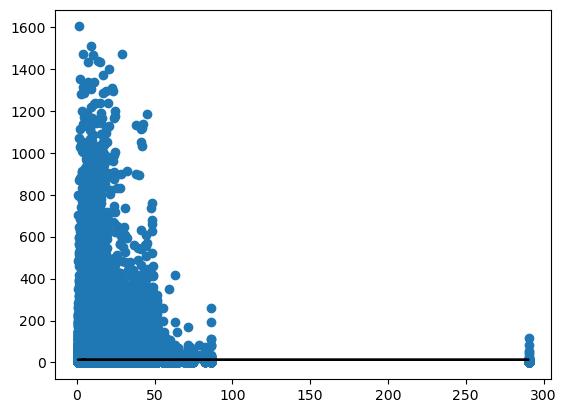

In [88]:
plt.scatter(X_train, y_train)
plt.plot(X_test, predictions,color='k')

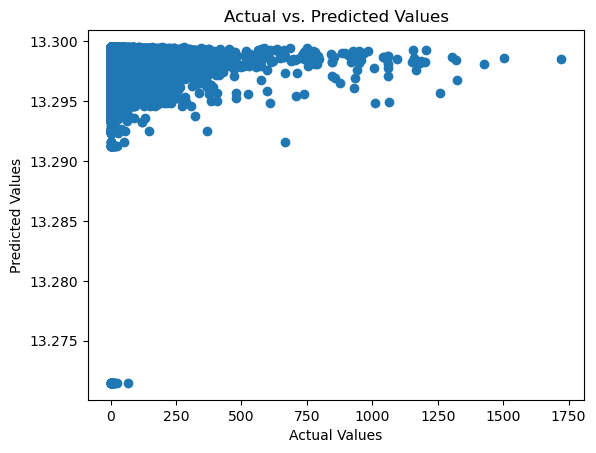

In [86]:
plt.scatter(y_test, predictions)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

__Hypothesis 2:__ Flights scheduled during the winter months(January, February) are more likely to be cancelled compared to flights  scheduled during other months of the year. 

In [ ]:
all_df["FlightDate"] = pd.to_datetime(all_df["FlightDate"])
print(all_df["FlightDate"].head())

In [ ]:
all_df['flight_month'] = pd.DatetimeIndex(df['FlightDate']).month
print(all_df['flight_month'].head())
month_mapping = {
    1: 'Jan',2: 'Feb',3: 'March', 4: 'April', 5: 'May', 6:'June', 7: 'July', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

all_df['flight_month'] = all_df['flight_month'].map(month_mapping)

print(all_df['flight_month'].head())

In [ ]:
all_df['Cancelled_bool'] = all_df['Cancelled'].astype(int)

In [ ]:
month_dummies = pd.get_dummies(all_df['flight_month'], 
                               dtype=int, drop_first = False) 
print(month_dummies.head())

In [ ]:
month_with_dummies = pd.concat([all_df, month_dummies ],axis=1)
print(month_with_dummies.head(5))

In [ ]:
#Now we will split this into a train and test dataframe 
from sklearn.model_selection import train_test_split
flight_cancelled_train, flight_cancelled_test = train_test_split(all_df , 
                                             test_size=0.20 , random_state=2950)

Now we want to train a logistic regression model to predict whether a movie is cancelled. We use a logistic regression model that predicts cancelled_bool given the month ( Jan, Feb, March, April, May, June, July, Aug, Sept, Oct, Nov, Dec).

In [ ]:
#code
from sklearn.linear_model import LogisticRegression
input_columns = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July']
def Normalizer(df_cols):
    scaler = preprocessing.StandardScaler().fit(df_cols)
    return(scaler.transform(df_cols))
X = flight_cancelled_train[input_columns]
y = flight_cancelled_train['Cancelled_bool']
logistic_model = LogisticRegression(random_state=16).fit(Normalizer(X),y)

In [ ]:
#Now print the coeff for all the months
# From the coeff we can figure out which has the highest correlation with the cancellation. 